In [1]:
#Importando Librerías

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

#nltk.download('vader_lexicon')

In [7]:
# Utilizando las librerías

#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\roger\AppData\Roaming\nltk_data...


In [8]:
#Generar token de autenticación para acceso a API de Twitter

consumerKey = 'SAnKuRMTOXRmhbcKlZgCVScjv'
consumerSecret = 'kBHgmInxzKZN0gtT7ih68EwnaXA4F47vlrHJbwqO0dy6eepA2o'
accessToken = '1453483019826868234-fUUxZzXUOLejxKDR0idPTbRV1bBulu'
accessTokenSecret = 'JOlUWcMP8xAukOxhx4aTeSiQZ5mkgR4ElFvgW690zVtpz'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [9]:
#Obtener tweets con base a una palabra clave o hashtag
def percentage(part,whole):
 return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweets = api.search_tweets(q=keyword, lang="en",count=noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    #language = analysis.detect_language()
    #if language != "en":
    #    analysis.translate(to="en")
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1

    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')


Please enter keyword or hashtag to search: Biden
Please enter how many tweets to analyze: 3000
RT @hikingskiing: Joe Biden is corrupt
RT @Richard_Harambe: Trump at a summit vs Biden at a summit https://t.co/bs6FtBKQEf
RT @capeandcowell: Biden personally murdered every single one of these people. 

Am I doing this right?
RT @ACTBrigitte: Everytime I fill up my car at the gas station I am reminded how bad of a President Joe Biden is.
@cnnbrk God gave CNN the only and one real news today after spreading a lot of fake news about Ethiopia more than a… https://t.co/I3sI5mOTf2
RT @ThatAmish1: Clearly self-defense! Video showing little girl’s reaction to Biden trying to get too close to her BEST thing you’ll watch…
RT @laurenboebert: To get a sense of how large Biden wants to grow our IRS.

@ElonMusk’s Tesla has about 70,000 employees.

@Apple has arou…
RT @MarshaBlackburn: Hunter Biden's firm helped a Chinese company with a $3.8 billion cobalt mine purchase.
@elonmusk Powell or Brainard? Bide

In [10]:
#Imprimir el numero de tweets (total, positivos, negativos, neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))


total number:  92
positive number:  24
negative number:  29
neutral number:  39


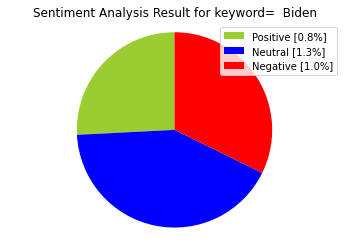

In [11]:
#Crear Gráfico

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()


In [12]:
tweet_list

,0
0,RT @hikingskiing: Joe Biden is corrupt
1,RT @Richard_Harambe: Trump at a summit vs Bide...
2,RT @capeandcowell: Biden personally murdered e...
3,RT @ACTBrigitte: Everytime I fill up my car at...
4,@cnnbrk God gave CNN the only and one real new...
...,...
87,RT @joncoopertweets: NEW: @POTUS has asked the...
88,RT @MarshaBlackburn: Hunter Biden's firm helpe...
89,RT @disclosetv: NEW - Hunter Biden's firm help...
90,"Biden says house burned ‘with my wife in it,’ ..."


In [13]:
tw_list = pd.DataFrame(tweet_list)
tw_list

,0
0,RT @hikingskiing: Joe Biden is corrupt
1,RT @Richard_Harambe: Trump at a summit vs Bide...
2,RT @capeandcowell: Biden personally murdered e...
3,RT @ACTBrigitte: Everytime I fill up my car at...
4,@cnnbrk God gave CNN the only and one real new...
...,...
87,RT @joncoopertweets: NEW: @POTUS has asked the...
88,RT @MarshaBlackburn: Hunter Biden's firm helpe...
89,RT @disclosetv: NEW - Hunter Biden's firm help...
90,"Biden says house burned ‘with my wife in it,’ ..."


In [14]:
tw_list["text"] = tw_list[0]

In [15]:
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @hikingskiing: Joe Biden is corrupt,joe biden is corrupt
1,RT @Richard_Harambe: Trump at a summit vs Bide...,trump at a summit vs biden at a summit
2,RT @capeandcowell: Biden personally murdered e...,biden personally murdered every single one of...
3,RT @ACTBrigitte: Everytime I fill up my car at...,everytime i fill up my car at the gas station...
4,@cnnbrk God gave CNN the only and one real new...,god gave cnn the only and one real news toda...
5,RT @ThatAmish1: Clearly self-defense! Video sh...,clearly self defense video showing little gi...
6,RT @laurenboebert: To get a sense of how large...,to get a sense of how large biden wants to gr...
7,RT @MarshaBlackburn: Hunter Biden's firm helpe...,hunter biden s firm helped a chinese company ...
8,@elonmusk Powell or Brainard? Biden expected t...,powell or brainard biden expected to make f...
9,RT @SputnikInt: Russian Foreign Ministry thoro...,russian foreign ministry thoroughly preparing...


In [16]:
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

In [17]:
tw_list

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @hikingskiing: Joe Biden is corrupt,joe biden is corrupt,-0.500000,1.000000,neutral,0.000,1.000,0.000,0.0000
1,RT @Richard_Harambe: Trump at a summit vs Bide...,trump at a summit vs biden at a summit,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @capeandcowell: Biden personally murdered e...,biden personally murdered every single one of...,0.071429,0.350000,negative,0.268,0.732,0.000,-0.6597
3,RT @ACTBrigitte: Everytime I fill up my car at...,everytime i fill up my car at the gas station...,-0.700000,0.666667,negative,0.171,0.829,0.000,-0.5423
4,@cnnbrk God gave CNN the only and one real new...,god gave cnn the only and one real news toda...,0.050000,0.700000,negative,0.134,0.776,0.091,-0.2500
...,...,...,...,...,...,...,...,...,...
87,RT @joncoopertweets: NEW: @POTUS has asked the...,new has asked the ftc to investigate oil a...,-0.181818,0.477273,neutral,0.000,1.000,0.000,0.0000
88,RT @MarshaBlackburn: Hunter Biden's firm helpe...,hunter biden s firm helped a chinese company ...,-0.100000,0.200000,neutral,0.000,1.000,0.000,0.0000
89,RT @disclosetv: NEW - Hunter Biden's firm help...,new hunter biden s firm helped chinese cong...,-0.015909,0.213636,neutral,0.000,1.000,0.000,0.0000
90,"Biden says house burned ‘with my wife in it,’ ...",biden says house burned with my wife in it ...,-0.050000,0.400000,neutral,0.000,1.000,0.000,0.0000


In [18]:
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [19]:
tw_list_neutral

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @hikingskiing: Joe Biden is corrupt,joe biden is corrupt,-0.500000,1.000000,neutral,0.0,1.0,0.0,0.0
1,RT @Richard_Harambe: Trump at a summit vs Bide...,trump at a summit vs biden at a summit,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
6,RT @laurenboebert: To get a sense of how large...,to get a sense of how large biden wants to gr...,0.207143,0.264286,neutral,0.0,1.0,0.0,0.0
7,RT @MarshaBlackburn: Hunter Biden's firm helpe...,hunter biden s firm helped a chinese company ...,-0.100000,0.200000,neutral,0.0,1.0,0.0,0.0
8,@elonmusk Powell or Brainard? Biden expected t...,powell or brainard biden expected to make f...,-0.100000,0.400000,neutral,0.0,1.0,0.0,0.0
10,RT @mmpadellan: If President Biden runs again ...,if president biden runs again in 2024 he abs...,0.200000,0.900000,neutral,0.0,1.0,0.0,0.0
11,RT @AVindman: In the context of Biden aims to ...,in the context of biden aims to normalize an...,-0.500000,0.700000,neutral,0.0,1.0,0.0,0.0
12,RT @joncoopertweets: NEW: @POTUS has asked the...,new has asked the ftc to investigate oil a...,-0.181818,0.477273,neutral,0.0,1.0,0.0,0.0
13,RT @mmpadellan: If President Biden runs again ...,if president biden runs again in 2024 he abs...,0.200000,0.900000,neutral,0.0,1.0,0.0,0.0
18,RT @OccupyDemocrats: BREAKING NEWS: President ...,breaking news president biden nominates two ...,0.136364,0.454545,neutral,0.0,1.0,0.0,0.0


In [20]:
tw_list_positive

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
5,RT @ThatAmish1: Clearly self-defense! Video sh...,clearly self defense video showing little gi...,0.304167,0.394444,positive,0.000,0.693,0.307,0.8126
9,RT @SputnikInt: Russian Foreign Ministry thoro...,russian foreign ministry thoroughly preparing...,0.102841,0.369886,positive,0.000,0.839,0.161,0.3182
17,RT @joncoopertweets: Has President Biden done ...,has president biden done a good job so far,0.400000,0.800000,positive,0.000,0.707,0.293,0.4404
23,RT @GeorgePapa19: While Biden canceled the key...,while biden canceled the keystone pipeline an...,0.300000,0.400000,positive,0.000,0.679,0.321,0.7269
25,"RT @duty2warn: Back in 2019, just before Thank...",back in 2019 just before thanksgiving when ...,0.333333,0.333333,positive,0.000,0.724,0.276,0.8396
28,RT @CarmineSabia: If Waukesha is a response to...,if waukesha is a response to the rittenhouse ...,0.000000,0.100000,positive,0.000,0.818,0.182,0.4588
31,@Samuel_sameerew @ThoughtCriminal @SamKraemerT...,sameerew who cares what color is was i...,0.000000,0.000000,positive,0.000,0.631,0.369,0.7650
36,RT @joncoopertweets: I think Dr. Jill Biden wi...,i think dr jill biden will go down as one of...,0.364815,0.307407,positive,0.000,0.826,0.174,0.6369
38,RT @RepSwalwell: President Biden is correct to...,president biden is correct to not attack our ...,0.000000,0.000000,positive,0.000,0.928,0.072,0.1967
42,RT @GeorgePapa19: Surely a coincidence that Bi...,surely a coincidence that biden pulled us out...,0.400000,0.894444,positive,0.000,0.854,0.146,0.4404


In [21]:
tw_list_negative

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
2,RT @capeandcowell: Biden personally murdered e...,biden personally murdered every single one of...,0.071429,0.350000,negative,0.268,0.732,0.000,-0.6597
3,RT @ACTBrigitte: Everytime I fill up my car at...,everytime i fill up my car at the gas station...,-0.700000,0.666667,negative,0.171,0.829,0.000,-0.5423
4,@cnnbrk God gave CNN the only and one real new...,god gave cnn the only and one real news toda...,0.050000,0.700000,negative,0.134,0.776,0.091,-0.2500
14,RT @johncardillo: .@CNN's entire existence is ...,s entire existence is covering up biden s ...,0.000000,0.312500,negative,0.434,0.566,0.000,-0.7845
15,RT @ChuckCallesto: BREAKING REPORT: Defamation...,breaking report defamation attorney todd mcm...,0.000000,0.000000,negative,0.147,0.791,0.062,-0.3612
16,RT @alwebbj: BREAKING: Defamation attorney Tod...,breaking defamation attorney todd mcmurtry ...,0.000000,0.000000,negative,0.139,0.802,0.059,-0.3612
19,@SKUsa11 Joe Biden and Kamala Harris stoked th...,joe biden and kamala harris stoked the flame...,-0.800000,0.900000,negative,0.174,0.751,0.075,-0.4767
21,RT @waltshaub: Voting rights? Biden “said that...,voting rights biden said that if he waded i...,-0.300000,0.400000,negative,0.119,0.881,0.000,-0.4019
22,RT @DineshDSouza: Why shouldn’t he be smiling?...,why shouldn t he be smiling he beat the pros...,0.000000,0.000000,negative,0.221,0.656,0.123,-0.3400
24,"RT @LivePDDave1: MSNBC, CNN and Joe Biden are ...",msnbc cnn and joe biden are to blame for wha...,0.000000,0.000000,negative,0.124,0.876,0.000,-0.3400


In [22]:
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [23]:
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,38,41.30
negative,32,34.78
positive,22,23.91


In [ ]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
create_wordcloud(tw_list_positive["text"])

In [ ]:
tw_list["text"]

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(tw_list_positive["text"].values[0])

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
plot_cloud(wordcloud)

In [ ]:
tw_list_positive["text"].values

In [ ]:
array = tw_list_positive["text"].values

In [ ]:
array

In [ ]:
array_negative = tw_list_negative["text"].values
array_negative

In [ ]:
StrA = "".join(array)

In [ ]:
StrB = "".join(array_negative)

In [ ]:
StrA

In [ ]:
StrB

In [ ]:
wordcloud_positive = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(StrA)

In [ ]:
wordcloud_negative = WordCloud(width= 3000, height = 2000, random_state=1, background_color='blue', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(StrB)

In [ ]:
def plot_cloud(wordcloud_positive):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud_positive) 
    # No axis details
    plt.axis("off");

In [ ]:
plot_cloud(wordcloud_positive)

In [ ]:
plot_cloud(wordcloud_negative)